In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
import tensorflow as tf
import keras

Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
X_train = tf.keras.utils.normalize(X_train, axis=1)

In [3]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [4]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

In C:\Users\HP\Desktop\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Desktop\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Desktop\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Desktop\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Desktop\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

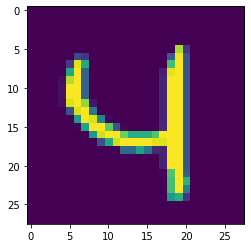

In [7]:
import matplotlib.pyplot as plt
g = plt.imshow(X_train[8][:,:,0])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [7]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(X_train, Y_train, batch_size = 32, epochs = 10, validation_data = (X_val, Y_val), verbose = 2)
test_loss,test_acc = model.evaluate(X_val, Y_val)
print('Test accuracy:', test_acc)

Epoch 1/10
1182/1182 - 52s - loss: 0.5144 - accuracy: 0.8363 - val_loss: 0.1085 - val_accuracy: 0.9724
Epoch 2/10
1182/1182 - 42s - loss: 0.1641 - accuracy: 0.9550 - val_loss: 0.0829 - val_accuracy: 0.9788
Epoch 3/10
1182/1182 - 42s - loss: 0.1205 - accuracy: 0.9677 - val_loss: 0.0704 - val_accuracy: 0.9805
Epoch 4/10
1182/1182 - 49s - loss: 0.0991 - accuracy: 0.9740 - val_loss: 0.0617 - val_accuracy: 0.9831
Epoch 5/10
1182/1182 - 46s - loss: 0.0864 - accuracy: 0.9778 - val_loss: 0.0587 - val_accuracy: 0.9852
Epoch 6/10
1182/1182 - 42s - loss: 0.0729 - accuracy: 0.9804 - val_loss: 0.0585 - val_accuracy: 0.9855
Epoch 7/10
1182/1182 - 43s - loss: 0.0655 - accuracy: 0.9824 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 8/10
1182/1182 - 44s - loss: 0.0579 - accuracy: 0.9846 - val_loss: 0.0518 - val_accuracy: 0.9879
Epoch 9/10
1182/1182 - 41s - loss: 0.0547 - accuracy: 0.9860 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 10/10
1182/1182 - 42s - loss: 0.0497 - accuracy: 0.9862 - val_loss:

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

In [10]:
print(confusion_mtx)

[[407   0   0   1   0   0   0   0   0   0]
 [  0 467   2   0   0   0   1   0   1   0]
 [  0   0 415   0   3   0   0   1   1   0]
 [  0   0   1 502   0   1   0   2   0   0]
 [  0   0   0   0 392   0   2   1   0   2]
 [  0   0   0   4   0 332   0   0   1   2]
 [  3   0   0   0   0   0 398   0   1   0]
 [  0   0   4   0   1   0   0 431   1   1]
 [  1   0   2   1   1   1   0   1 396   0]
 [  0   0   0   0   1   0   0   0   2 413]]


In [11]:
from sklearn import metrics
print("Accuracy of the model: ", round(metrics.accuracy_score(Y_true, Y_pred_classes)*100,3))

Accuracy of the model:  98.881


In [12]:
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [13]:
import tensorflowjs as tfjs 
tfjs.converters.save_keras_model(model, 'models')